# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.
2. Predecir el volúmen de precipitaciones (columna *Rainfall* del dia siguiente), en función al *Rainfall* del dia actual


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Para cada uno de los problemas propuestos, defina una lista de modelos candidatos a entrenar. Justifique sus elecciones. 

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
pd.set_option("display.max_columns", None)

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Partición de train-test set
from sklearn.model_selection import train_test_split



### 1. Análisis exploratorio inicial

In [ ]:
weather_aus_df = pd.read_csv('data/weatherAUS.csv', parse_dates=['Date'])
weather_aus_df.shape

In [ ]:
weather_aus_df.head(5)

In [ ]:
weather_aus_df.info()

In [ ]:
weather_aus_df.describe()

This dataset contains about 10 years of daily weather observations from many locations across Australia.

Date: The date of observation
Location: The common name of the location of the weather station
RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
WindDir3pm: Direction of the wind at 3pm
WindDir9am: Direction of the wind at 9am
WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

MinTemp: The minimum temperature in degrees celsius
MaxTemp: The maximum temperature in degrees celsius
Rainfall: The amount of rainfall recorded for the day in mm
Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine: The number of hours of bright sunshine in the day.
WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3am
Humidity9am: Humidity (percent) at 9am
Humidity3pm: Humidity (percent) at 3pm
Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast
Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am: Temperature (degrees C) at 9am
Temp3pm: Temperature (degrees C) at 3pm

RainTomorrow: The target variable. Did it rain tomorrow? (1 = yes, 0 = no )


#### variables numericas

In [ ]:
print('Columnas con variables numéricas')
numeric_df = weather_aus_df.select_dtypes(exclude=['category', object]).columns
numeric_df.values


In [ ]:
def distributionPlots(df, numeric_columns):
    fig, axes =plt.subplots(6,3, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], ax=ax)
            i+=1

distributionPlots(weather_aus_df, numeric_df.values)

* Date es una variables compuesta (year-month-day), proponemos descomponerlo.
* Temp9m, Temp3pm, MinTemp, MaxTemp se asemejan a una normal
* WindGustSpeed, WindSpeed9am y WindSpeed3pm son v.a continuas pero no tiene suficientes muestras para completar su distribución.
* Rainfall, Evaporation y sunshine tienen otra forma de distribución diferente a una normal o no tienen suficientes muestras.
* Humidity9am y Humidity3pm tienen oblicuidad.
* Pressure9am y Pressure3pm también se asemejan a una distribución normal.
* Cloud3pm y Cloud9am son v.a discretas medidas en ‘Octa’, https://es.wikipedia.org/wiki/Octa

#### variables categoricas

In [ ]:
print('Columnas con variables categóricas')
categorical_df = weather_aus_df.select_dtypes(include=['category', object]).columns
categorical_df.values

In [ ]:
def countPlots(df, column_names):
    fig, axes =plt.subplots(3,2, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            sns.countplot(x = column_names[i],
                   data = df, ax=ax)
            i+=1

countPlots(weather_aus_df, categorical_df.values)

* Location,  WindGustDir, WinDir9am y WinDir3pm está bastante bien balanceadas.
* WindGustDir, WinDir9am y WinDir3pm tienen las mismas unidades/labels
* RainToday y RainTomorrow solo tienen 2 etiquetas ('Yes' o 'No')

#### Valores unicos/cardinalidad

In [ ]:
for i in categorical_df.values:
    print(i, weather_aus_df[i].unique(), len(weather_aus_df[i].unique()))

* La variable 'Location' posee mayor cardinalidad (49), vamos a proponer Label encoding o dummy encoding (genera mas dimensiones)
* Las variables 'WindGustDir', 'WindDir9am' y 'WindDir3pm' se puede usar una transformacion de sin y cosine o Label encoding
* Las variables RainToday y RainTomorrow se encuentran desbalanceadas, existen más muestras de cuando no llueve. Usaremos dummy encoding.

#### Variable de salida

In [ ]:
weather_aus_df["RainTomorrow"].value_counts()

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
                   data = weather_aus_df, ax=axes)

¿Qué técnicas consideraría para codificar la variable de salida?
Como trabajaremos con una clasificación binaria entonces la forma de codificar la variable de salida es simple, usamos 1 para Yes y 0 para No (dummy encoding).

¿Están balanceadas las clases?
Las clases de la variable de salida están desbalanceadas, buscaremos que la proporcion se mantenga en Train,Validation y Test

### 2. Esquema de validación de resultados
tomamos un 20% de los datos para test.

In [ ]:

train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(weather_aus_df.drop(columns=['RainTomorrow']), weather_aus_df['RainTomorrow'], test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

#### Revisar que las distribuciones en train y test que sean parecidas

In [ ]:
X_train.describe()

In [ ]:
X_test.describe()

In [ ]:
distributionPlots(X_train, X_train.select_dtypes(exclude=['category', object]).columns.values)

In [ ]:
distributionPlots(X_test, X_test.select_dtypes(exclude=['category', object]).columns.values)


In [ ]:
countPlots(X_train, X_train.select_dtypes(include=['category', object]).columns.values)

In [ ]:
countPlots(X_test, X_test.select_dtypes(include=['category', object]).columns.values)

* Las distribuciones se asemejan en train y test

In [ ]:
for column in weather_aus_df.select_dtypes(include=['category', object]).columns.values:
    if column != 'RainTomorrow':
        print('categórica {}, labels in train:{}, labels in test:{}'.format(column, len(X_train.dropna()[column].unique()), len(X_test.dropna()[column].unique())))

* No hay ninguna etiqueta que aparezca en train y no en test y viceversa.

#### Revisar distribución de variable de salida


In [ ]:

fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_train.to_frame(), ax=axes)

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_test.to_frame(), ax=axes)

* Tenemos la misma distribución de la variable de salida en train y test

#### Porcentaje Valores faltantes en Train y Test

In [ ]:
count_nulls = pd.concat([X_train, y_train], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_train) * 100

Similares cantidades de valores faltantes en train y test

In [ ]:
count_nulls = pd.concat([X_test, y_test], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_test) * 100

En general las distribuciones de las variables numéricas y categóricas se mantienen en train y test, la variable de salida tambien mantiene similar distribución

### 3. Limpieza y preparación de datos / ingeniería de features

#### Imputacion de Valores faltantes

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

count_nulls = train_df.isnull().sum().sort_values(ascending=False)
print("# columnas con datos faltantes: ", len(count_nulls[count_nulls > 0]))
print('Porcentaje de datos faltantes x Columna: ')
count_nulls/len(train_df) * 100

In [ ]:
df1 = train_df[train_df.isnull().any(axis=1)]
print("filas con al menos 1 NaN (%) ", len(df1)/len(train_df) * 100)

* Alrededor del 61% de las filas cuentan con al menos 1 dato faltante, no podemos simplemente eliminarlas, analizamos la imputación de variables para cada columna.


#### Imputación de 'Sunshine'
Posee muchos valores faltantes (48%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de 'Evaporation'
Posee muchos valores faltantes (43%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de Cloud3pm y Cloud9am
drop Cloud3pm y Cloud9am, 40% y 38% de datos faltantes. Se elimina la columna porque imputarlo alteraría mucho su distribución.

In [ ]:
train_df = train_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

#### Imputación de Rainfall, RainToday y RainTomorrow

In [ ]:
# nulos en 'Rainfall' y 'RainToday' en la misma fila
print(train_df['Rainfall'].isnull().sum(), len(train_df[train_df['Rainfall'].isnull() & train_df['RainToday'].isnull()]))

* Como Rainfall está relacionado con RainToday, podemos ver que ambos tienen nulos al mismo tiempo. Como la cantidad de nulos es 2.24% podemos simplemente eliminar las filas con datos faltantes.

In [ ]:
train_df = train_df.dropna(subset=['Rainfall', 'RainToday'])

También eliminamos los nulos de 'RainTomorrow' porque son menor al 5%

In [ ]:
train_df = train_df.dropna(subset=['RainTomorrow'])

#### Remover filas con nulos menor al 5%

In [ ]:
train_df = train_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

#### Imputación de WindGustDir y WindDir9am (categóricas)
imputación por categoría más frecuente

In [ ]:
moda_WindGustDir = train_df['WindGustDir'].value_counts().index[0]
moda_WindDir9am = train_df['WindDir9am'].value_counts().index[0]
print(moda_WindGustDir, moda_WindDir9am)

In [ ]:
train_df['WindGustDir'] = train_df['WindGustDir'].fillna(moda_WindGustDir)
train_df['WindDir9am'] = train_df['WindDir9am'].fillna(moda_WindDir9am)

#### Imputación de WindGustSpeed
imputación por la mediana

In [ ]:
median_WindGustSpeed = train_df['WindGustSpeed'].median()
print(median_WindGustSpeed)

In [ ]:
train_df['WindGustSpeed'] = train_df['WindGustSpeed'].fillna(median_WindGustSpeed)

#### Imputación de Pressure3pm y Pressure9am
presentan alrededor del 10% de nulos
Imputación por KNN o imputacion por mediana

In [ ]:
median_Pressure9am = train_df['Pressure9am'].median()
print(median_Pressure9am)

median_Pressure3pm = train_df['Pressure3pm'].median()
print(median_Pressure3pm)

In [ ]:
train_df['Pressure9am_median'] = train_df['Pressure9am'].fillna(median_Pressure9am)
train_df['Pressure3pm_median'] = train_df['Pressure3pm'].fillna(median_Pressure3pm)

In [ ]:

knn_df = train_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
imputer = KNNImputer(n_neighbors=3)
X_train_knn_imp = imputer.fit_transform(knn_df)

In [ ]:
train_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
train_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

#### Codificacion de variables categoricas

### Date
Para esto dividimos la fecha en year, month, date

In [ ]:
train_df.loc[:,'Date_day'] = train_df['Date'].apply(lambda  x: x.day)
train_df.loc[:,'Date_month'] = train_df['Date'].apply(lambda  x: x.month)
train_df.loc[:,'Date_year'] = train_df['Date'].apply(lambda  x: x.year)

* Podríamos pensar que el mes tiene más relacion con la variable objetivo.

### Location
Hacemos label encoding porque genera solo 1 columna, si aplicáramos dummy encoding generaría 48 columnas


In [ ]:
location_le = LabelEncoder()
location_le.fit(train_df['Location'])
len(list(location_le.classes_))

In [ ]:
train_df.loc[:, 'Location_le'] = location_le.transform(train_df['Location'])

### WindGustDir, WindDir3pm y WindDir9am
Hacemos una transformacion por sin y cos o label encoding

In [ ]:
# traduccion a grados sexagesimales
windDir_grados = {'E': 0, 'ENE': 22.5, 'NE': 45, 'NNE': 67.5, 'N':90, 'NNW': 112.5, 'NW': 135, 'WNW': 157.5, 'W': 180,
                  'WSW':202.5, 'SW': 225, 'SSW':247.5, 'S':270, 'SSE':292.5, 'SE':315, 'ESE': 337.5}

In [ ]:
def sin_wind_dir(wind):
    return np.sin(windDir_grados[wind]*np.pi/180)
def cos_wind_dir(wind):
    return np.cos(windDir_grados[wind]*np.pi/180)

train_df['WindGustDir_sin'] = train_df['WindGustDir'].apply(sin_wind_dir)
train_df['WindGustDir_cos'] = train_df['WindGustDir'].apply(cos_wind_dir)
train_df['WindDir3pm_sin'] = train_df['WindDir3pm'].apply(sin_wind_dir)
train_df['WindDir3pm_cos'] = train_df['WindDir3pm'].apply(cos_wind_dir)
train_df['WindDir9am_sin'] = train_df['WindDir9am'].apply(sin_wind_dir)
train_df['WindDir9am_cos'] = train_df['WindDir9am'].apply(cos_wind_dir)

In [ ]:
windDir_le = LabelEncoder()
windDir_le.fit(train_df['WindGustDir'])
len(list(windDir_le.classes_))

In [ ]:
train_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(train_df['WindGustDir'])
train_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(train_df['WindDir3pm'])
train_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(train_df['WindDir9am'])

### 'RainToday' y 'RainTomorrow'
dummy encoding, como solo hay dos clases, conviene reemplazar yes=1 y no=0


In [ ]:
train_df.loc[:, 'RainToday_enc'] = train_df['RainToday'].replace(('Yes', 'No'), (1, 0))
train_df.loc[:, 'RainTomorrow_enc'] = train_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

##### Tratamiento de valores extremos
Análisis de valores extremos

In [ ]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [ ]:
def boxplots(df, columns):
    fig, axes =plt.subplots(4,3, figsize=(20,15))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(columns):
            sns.boxplot(data = df, x = columns[i], ax=ax)
            i+=1

boxplots(train_df, columns)


* podríamos eliminar outliers de distribuciones que se asemejen mas a un normal: 'MinTemp', 'MaxTemp',  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
* WinGustSpeed, WindSpeed9am y WindSpeed3pm como vimos antes no poseen muchas muestras, por lo tanto, no se puede decir mucho sobre los outliers.
* A simple vista podríamos pensar que 'Rainfall' presenta muchos outliers

### Rainfall
Podríamos intuir que posee muchos outliers

In [ ]:
train_df[train_df['RainToday'] == 'Yes']['Rainfall'].describe()

In [ ]:
train_df[train_df['RainToday'] == 'No']['Rainfall'].describe()

* Notamos que cuando Rainfall>1mm entonces RainToday=Yes

In [ ]:
# scatter plot con la variable Humidity9am
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=train_df, x="Humidity9am", y="Rainfall", hue="RainToday", ax=axes)

* El boxplot no muestra la distribución real de Rainfall, esto debido a que RainToday está desbalanceado.
* No podemos simplemente eliminar los outliers, porque eliminaríamos muchos casos de 'RainToday'=Yes

### Funciones de pre-procesamiento
Con base en lo definido en imputación y codificación de variables categóricas, construimos funciones con diferentes pre-procesamiento

In [ ]:
'''
# 'WindGustDir y WindDir9am' imputación por moda
# 'WindGustSpeed' imputación por mediana
# 'Pressure3pm' y 'Pressure9am' imputación por kNN

# 'Date' year-month-day decomposition encoding
# 'Location' label encoding
# 'WindGustDir, WindDir9am, WindDir3pm' sin/cosine transformation
# 'RainToday, RainTomorrow' dummy encoding
'''
def pre_processing_1(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    # kNN imputer Pressure3pm y Pressure9am

    knn_df = XY_result_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
    X_train_knn_imp = imputer.transform(knn_df)
    XY_result_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
    XY_result_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df['WindGustDir_sin'] = XY_result_df['WindGustDir'].apply(sin_wind_dir)
    XY_result_df['WindGustDir_cos'] = XY_result_df['WindGustDir'].apply(cos_wind_dir)
    XY_result_df['WindDir3pm_sin'] = XY_result_df['WindDir3pm'].apply(sin_wind_dir)
    XY_result_df['WindDir3pm_cos'] = XY_result_df['WindDir3pm'].apply(cos_wind_dir)
    XY_result_df['WindDir9am_sin'] = XY_result_df['WindDir9am'].apply(sin_wind_dir)
    XY_result_df['WindDir9am_cos'] = XY_result_df['WindDir9am'].apply(cos_wind_dir)

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df


In [1014]:
'''
# 'WindGustDir y WindDir9am' imputación por moda
# 'WindGustSpeed' imputación por mediana
# 'Pressure3pm y Pressure9am' imputación por mediana

# 'Date' year-month-day decomposition encoding
# 'Location' label encoding
# 'WindGustDir, WindDir9am, WindDir3pm' label encoding
# 'RainToday, RainTomorrow' dummy encoding
'''
def pre_processing_2(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    #Pressure3pm y Pressure9am imputación por mediana
    XY_result_df['Pressure9am_median'] = XY_result_df['Pressure9am'].fillna(median_Pressure9am)
    XY_result_df['Pressure3pm_median'] = XY_result_df['Pressure3pm'].fillna(median_Pressure3pm)

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(XY_result_df['WindGustDir'])
    XY_result_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(XY_result_df['WindDir3pm'])
    XY_result_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(XY_result_df['WindDir9am'])

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df

In [ ]:
train_df.head()

#### Seleccion de features

In [ ]:
numeric_c_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Pressure3pm_median', 'Pressure9am_median', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos']

numeric_d_columns = ['Location_le', 'Date_day', 'Date_month', 'Date_year', 'RainToday_enc', 'WindGustDir_le', 'WindDir3pm_le', 'WindDir9am_le']

categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
target_column=['RainTomorrow_enc']

XY_train_df = train_df
X_train_df = train_df.drop(columns='RainTomorrow_enc')
y_train_df = train_df[target_column]

In [ ]:
from scipy import stats
def qqPlots(df, numeric_columns):
    fig, axes =plt.subplots(4,3, figsize=(20,22))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            stats.probplot(df[numeric_columns[i]], dist="norm", plot=ax)
            ax.set_title(numeric_columns[i])
            i+=1

qqPlots(XY_train_df, numeric_c_columns)

* Como vimos anteriormente MinTemp, MaxTemp, Pressure9am,  Pressure3pm, Temp9am y Temp3pm se asemejan mas a una normal.
por lo tanto podríamos analizar sus correlaciones con Pearson


#### Correlacion pearson/spearman

In [ ]:
normal_columns = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [ ]:
# correlacion pearson
correlation_matrix = XY_train_df[normal_columns].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

* Podemos ver que 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'MaxTemp' están altamente correlacionadas (escogeremos solo la que mejor se relacione con la salida)
* Podemos ver que 'Pressure9am' y 'Pressure3pm' están altamente correlacionadas

In [ ]:
correlation_matrix = XY_train_df.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(25,25))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

#### Informacion Mutua¶

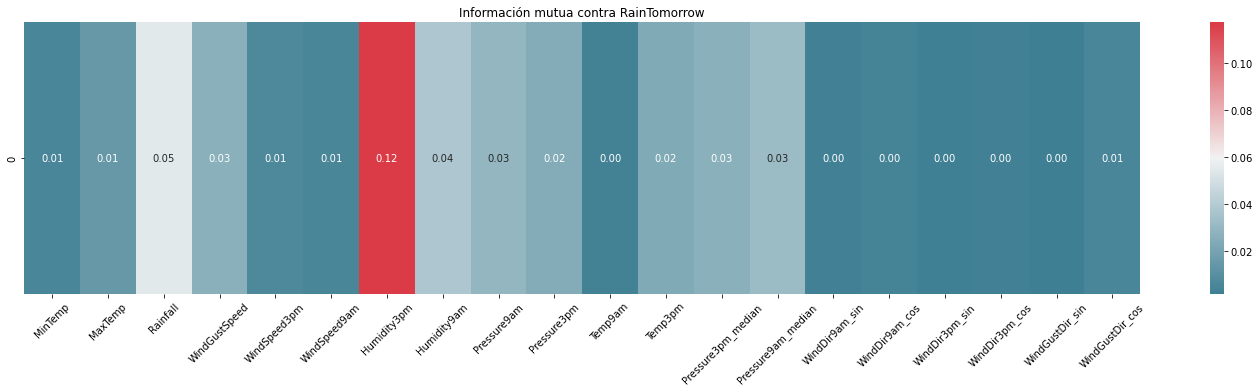

In [1032]:
# informacion mutua
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(X_train_df[numeric_c_columns], y_train_df['RainTomorrow_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

In [ ]:
MI = mutual_info_classif(X_train_df[numeric_d_columns], y_train_df['RainTomorrow_enc'].to_numpy(), discrete_features=True)
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_d_columns)
ax.tick_params(axis='x', rotation=45)

In [ ]:
MI = mutual_info_classif(X_train_df[numeric_c_columns], X_train_df['RainToday_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainToday')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

In [ ]:
MI = mutual_info_classif(X_train_df[numeric_d_columns], X_train_df['RainToday_enc'].to_numpy(), discrete_features=True)
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainToday')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_d_columns)
ax.tick_params(axis='x', rotation=45)

* Suponemos que los datos metereológicos del dia de hoy tienen una relacion con 'RainToday'.
* Como se observa 'Rainfall' y 'RainToday' tienen dependencia.

Nos quedamos con las siguientes variables:

In [1031]:
feature_selection_1 = ['Location_le', 'Date_month', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

feature_selection_2 = ['Location_le', 'Date_month', 'WindGustDir_le', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am_median', 'Rainfall']

X_train_s1 = X_train_df[feature_selection_1]
X_train_s2 = X_train_df[feature_selection_2]
y_train = y_train_df

### 4. Entrenamiento de modelos

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [ ]:
class LogisticRegressionNumpy(object):

    def __init__(self):
        self.w = None

    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """
    def fit(self, X=None, y=None, lr=0.01, epochs=100, b=16, gradient='SGD'):

        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'MINI':
            h, w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.w = w
            return h, w

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        pred = self.sigmoid(np.dot(X_expanded, self.w))
        return np.array([1 if i >= 0.5 else 0 for i in pred])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def bce(self, X, y, theta):
        h = self.sigmoid(np.dot(X, theta))
        return (1 / len(y)) * ((np.dot((-y).T, np.log(h))) - (np.dot((1 - y).T, np.log(1 - h))))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss


    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)
        hist_cos = np.zeros((amt_epochs, 1))
        # iterate over the n_epochs
        for j in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Update the weights
                #W = W - (lr / batch_size) * np.dot(batch_X.T, (self.sigmoid(np.dot(batch_X, W)) - batch_y))

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)

            hist_cos[j] = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            #hist_cos[j] = self.bce(X_train, y_train, W)

        return hist_cos, W


class BaseMetric:
    def __init__(self, **kwargs):
        self.parameters = kwargs

    def __call__(self, *args, **kwargs):
        pass


class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n


class Accuracy(Metric):
    def __call__(self, target, prediction):
        return np.mean(target == prediction, axis=0)


class Precision(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FP)


class Recall(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FN)

* Usamos StratifiedKFold para mantener la misma distribucion de etiquetas durante e k-fold cv

In [ ]:
# Proporcion de las clases en K-Fold
skf = StratifiedKFold(n_splits=5)

# revisamos si mantenemos las etiquetas tanto en train y validation
for train_index, test_index in skf.split(X_train_s1.values, y_train.values):
    print(y_train.iloc[train_index, :].value_counts().to_numpy()/len(train_index))
    print(y_train.iloc[test_index, :].value_counts().to_numpy()/len(test_index))

In [ ]:
# K-folds, metrica F1-score
def k_folds(X, y, lr, b, epochs):
    f1score_list = []
    log_reg = LogisticRegressionNumpy()
    for train_index, test_index in skf.split(X, y):
        #scale
        X_train_scaled = scaler.transform(X[train_index])
        X_val_scaled = scaler.transform(X[test_index])

        #fit
        log_reg.fit(X=X_train_scaled, y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = log_reg.predict(X_val_scaled)
        metrics_list = [Accuracy(), Precision(), Recall()]
        metrics = [metric(y[test_index].ravel(), y_val_predict.ravel()) for metric in metrics_list]
        F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
        f1score_list.append(F1)
    return np.mean(f1score_list)

## CASO 1:
pre_processing_1 + feature_selection_1

### Logistic Regression

In [ ]:
X_train = X_train_df[feature_selection_1]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

* pre-processing Test data, se usa después

In [ ]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_1]
y_test_p1 = XY_test[['RainTomorrow_enc']]

### ParameterGrid search

In [ ]:
# seleccion de hiperparametros con clases propias
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

In [1016]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 32})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 32}


### Desempeño con validación

In [ ]:
# test con porción de validación
log_reg = LogisticRegressionNumpy()
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

h, w = log_reg.fit(X=X_train_scaled, y=y_train_1.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')
y_val_predict = log_reg.predict(X_val_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))


### Desempeño con test

In [ ]:
log_reg = LogisticRegressionNumpy()
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test_p1.values)

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [ ]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

X_train_scaled = scaler.transform(X_train.values)

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


### Desempeño con validación

In [ ]:
# test con porcion de validacion

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='liblinear', max_iter=100)
clf.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = clf.predict(X_val_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

### Desempeño con test

In [ ]:
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test_p1.values)

clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='liblinear', max_iter=100)
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

In [1017]:
# result F1-score  validation, test
lreg_result_c1 = [0.5607476635514018, 0.5559686080132177]
lreg_result_c1

[0.5607476635514018, 0.5559686080132177]

### SVM Classifier

### Desempeño con validación

In [ ]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = svm.predict(X_val_scaled)
print('f1-score: ', f1_score(y_val_1.ravel(), y_val_predict.ravel(), average='binary'))

### Desempeño con test

In [ ]:
X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = svm.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

In [1018]:
# result F1-score  validation, test
svm_result_c1 = [0.5343327533128096, 0.5328451432263622]
svm_result_c1

[0.5343327533128096, 0.5328451432263622]

### RandomForest Classifier

### Desempeño con validación

In [ ]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = forest.predict(X_val_scaled)
print('f1-score: ', f1_score(y_val_1.ravel(), y_val_predict.ravel(), average='binary'))

### Desempeño con test

In [ ]:
X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

In [1019]:
forest_result_c1 = [0.5969323610761881, 0.6001195457262403]
forest_result_c1

[0.5969323610761881, 0.6001195457262403]

## CASO 2:
pre_processing_2 + feature_selection_2

### Logistic Regression

In [1033]:
X_train = X_train_df[feature_selection_2]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

* pre-processing Test data, se usa después

In [1034]:
XY_test = pre_processing_2(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_2]
y_test_p1 = XY_test[['RainTomorrow_enc']]

### ParameterGrid search

In [1036]:
# seleccion de hiperparametros con clases propias
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid

{'lr': 0.05, 'epochs': 100, 'batch_size': 64}

In [1021]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 32})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 32}


### Desempeño con validación

In [1038]:
# test con porción de validación
log_reg = LogisticRegressionNumpy()
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

h, w = log_reg.fit(X=X_train_scaled, y=y_train_1.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')
y_val_predict = log_reg.predict(X_val_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))


Accuracy: 0.8385898090947095
Precision: 0.7055256064690026
Recall: 0.4460063897763578
F1-score: 0.5465222497716298


### Desempeño con test

In [1039]:
log_reg = LogisticRegressionNumpy()
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test_p1.values)

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Accuracy: 0.8409470441978699
Precision: 0.7142098273572377
Recall: 0.45583997287675876
F1-score: 0.5564983443708609


Text(0.5, 1.0, 'Funcion de Costo')

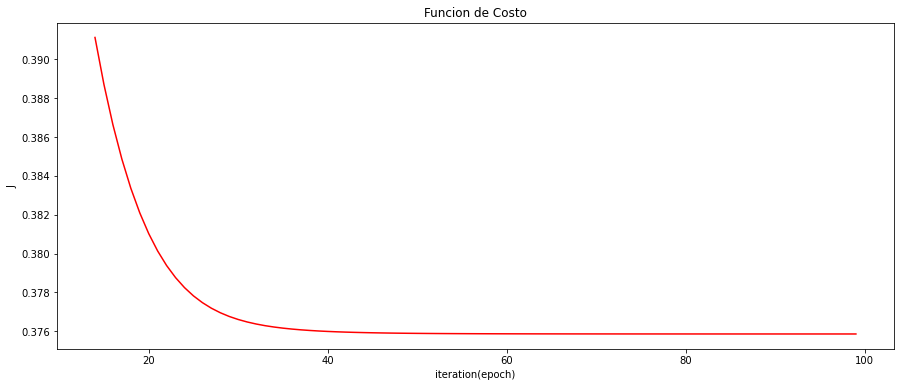

In [1040]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [1041]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

X_train_scaled = scaler.transform(X_train.values)

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5543095850533241 with hyper-parameters {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


### Desempeño con validación

In [1042]:
# test con porcion de validacion

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='liblinear')
clf.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = clf.predict(X_val_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8407264619815134
Precision: 0.7118473895582329
Recall: 0.45303514376996806
F1-score: 0.5536899648574776


### Desempeño con test

In [1043]:
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test_p1.values)

clf = LogisticRegression(C=0.1, penalty='l2', fit_intercept=True, solver='liblinear')
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8409470441978699
Precision: 0.7142098273572377
Recall: 0.45583997287675876
F1-score: 0.5564983443708609


In [1044]:
# result F1-score  validation, test
lreg_result_c2 = [0.5536899648574776, 0.5564983443708609]
lreg_result_c2

[0.5536899648574776, 0.5564983443708609]

### SVM Classifier

### Desempeño con validación

In [1045]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = svm.predict(X_val_scaled)
print('f1-score: ', f1_score(y_val_1.ravel(), y_val_predict.ravel(), average='binary'))

f1-score:  0.5342502696871628


### Desempeño con test

In [1046]:
X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = svm.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5309272747037721


In [1049]:
# result F1-score  validation, test
svm_result_c2 = [0.5342502696871628, 0.5309272747037721]
svm_result_c2

[0.5342502696871628, 0.5309272747037721]

### RandomForest Classifier

### Desempeño con validación

In [1047]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = forest.predict(X_val_scaled)
print('f1-score: ', f1_score(y_val_1.ravel(), y_val_predict.ravel(), average='binary'))

f1-score:  0.6115196078431371


### Desempeño con test

In [1048]:
X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.6011364769215432


In [1050]:
forest_result_c2 = [0.6115196078431371, 0.6011364769215432]
forest_result_c2

[0.6115196078431371, 0.6011364769215432]

### 5. Evaluación de resultados y conclusiones

In [1065]:
results = {'LogisticRegression': {}, 'SVM': {}, 'RandomForest': {}}
results['LogisticRegression']['CASO_1'] = lreg_result_c1[1]
results['LogisticRegression']['CASO_2'] = lreg_result_c2[1]
results['SVM']['CASO_1'] = svm_result_c1[1]
results['SVM']['CASO_2'] = svm_result_c2[1]
results['RandomForest']['CASO_1'] = forest_result_c1[1]
results['RandomForest']['CASO_2'] = forest_result_c2[1]

In [1066]:
df_results = pd.DataFrame(results)

Text(0, 0.5, 'F1-score')

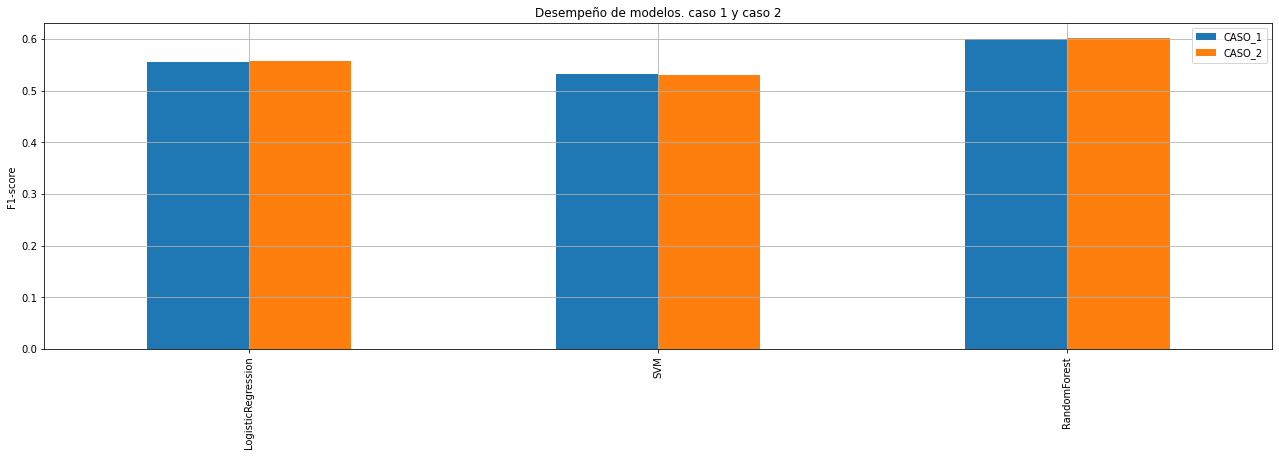

In [1073]:
axes = df_results.T.plot.bar(title="Desempeño de modelos. caso 1 y caso 2", figsize=(22,6))
axes.grid('both')
axes.set_ylabel('F1-score')

* Se obtienen desempeños cercanos en los 3 modelos
* El que posee el mejor desempeño fue RandomForest (F1-score=0.6011) con el caso 2
Caso 2 utiliza como features:

In [1074]:
['Location_le', 'Date_month', 'WindGustDir_le', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am_median', 'Rainfall']

['Location_le',
 'Date_month',
 'WindGustDir_le',
 'WindGustSpeed',
 'Humidity3pm',
 'Temp3pm',
 'Pressure9am_median',
 'Rainfall']

Junto con el procesamiento 2:

In [1075]:
# 'WindGustDir' imputación por moda
# 'WindGustSpeed' imputación por mediana
# 'Pressure9am' imputación por mediana

# 'Date' year-month-day decomposition encoding
# 'Location' label encoding
# 'WindGustDir' label encoding

* RandomForest obtiene el mejor desempeño trabajando con las variables categóricas codificadas con label encoding, esto tiene sentido porque los modelos basados en árboles pueden trabajar con variables categóricas sin la necesidad de codificarlas.


## Predecir el volúmen de precipitaciones (columna Rainfall del dia siguiente), en función al Rainfall del dia actual

### Obtener 'Rainfall_Tomorrow'

In [1083]:
w_df = weather_aus_df.set_index('Date')[['Rainfall', 'RainToday', 'RainTomorrow']]

In [1086]:
w_df = w_df.dropna()

In [ ]:
rainfall_dict = {'Rainfall_today':[], 'Rainfall_tomorrow': []}

In [1127]:
i=0
for index, row in w_df.iterrows():
    if (i+1) < len(w_df):
        if (index + pd.DateOffset(days=1)) == w_df.iloc[i+1, :].name:
            rainfall_dict['Rainfall_today'].append(row['Rainfall'])
            rainfall_dict['Rainfall_tomorrow'].append(w_df.iloc[i+1, :]['Rainfall'])
    i+=1


In [1128]:
rainfall_df = pd.DataFrame(rainfall_dict)
rainfall_df.head()

,Rainfall_today,Rainfall_tomorrow
0,0.6,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,0.2


#### Scatter plot

<AxesSubplot:xlabel='Rainfall_today', ylabel='Rainfall_tomorrow'>

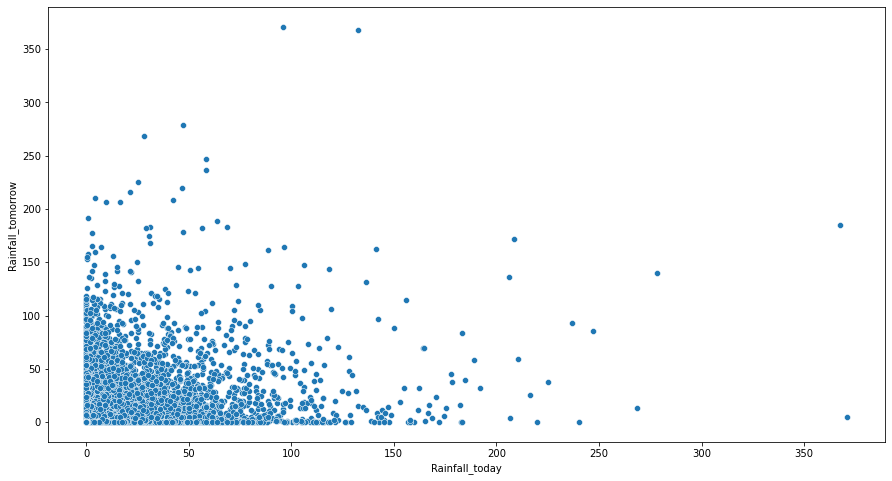

In [1130]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=rainfall_df, x="Rainfall_today", y="Rainfall_tomorrow", ax=axes)


* A simple vista no podemos ver una relacion lineal entre el rainfall de hoy y del dia siguiente.

<AxesSubplot:xlabel='Rainfall_tomorrow'>

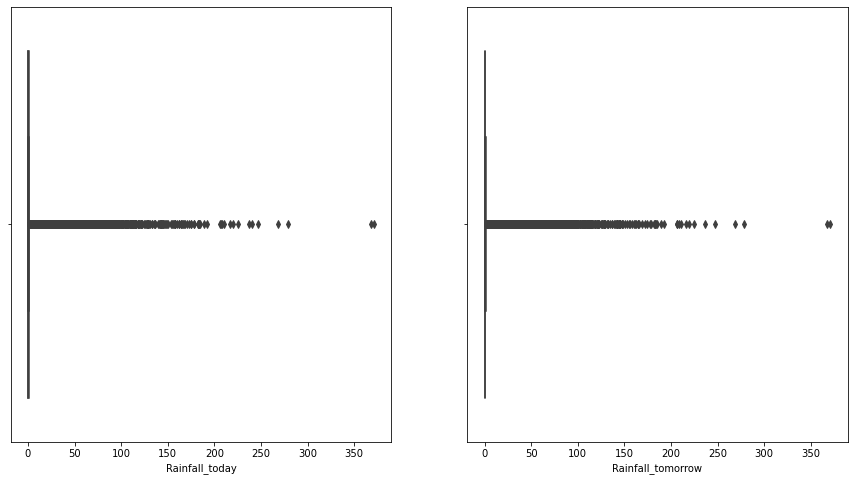

In [1136]:
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(data = rainfall_df, x = 'Rainfall_today', ax=axes[0])
sns.boxplot(data = rainfall_df, x = 'Rainfall_tomorrow', ax=axes[1])

### Partición en Train y Test

In [1137]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(rainfall_df.drop(columns=['Rainfall_tomorrow']), rainfall_df['Rainfall_tomorrow'], test_size=test_ratio)

print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (111425, 1) (111425,)
Test: (27857, 1) (27857,)


### Standarization


In [1144]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train.values)
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))


### Modeladob

In [1142]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)


class LinearRegressionWithGradient(BaseModel):
    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """

    def fit(self, X, y, lr=0.01, epochs=100, b=16, gradient='SGD'):
        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'BGD':
            w = self.gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'SGD':
            w = self.stochastic_gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'SGD':
            w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.model = w
            return w


    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)

    def gradient_descent(self, X_train, y_train, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X_train.shape[0]
        m = X_train.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)  # mx1

        for i in range(amt_epochs):
            # Calculate the predictions for all samples
            prediction = np.matmul(X_train, W)  # nx1

            # Calculate the error for all samples
            error = y_train - prediction  # nx1

            # Calculate the gradient for all samples
            grad_sum = np.sum(error * X_train, axis=0)
            grad_mul = -2 / n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul)  # mx1 (it also works with reshape)

            # Update the parameters
            W = W - (lr * gradient)

        return W

    def stochastic_gradient_descent(self, X_train, y_train, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X_train.shape[0]
        m = X_train.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # Iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X_train.shape[0])
            X_train = X_train[idx]
            y_train = y_train[idx]

            # Iterate over each sample
            for j in range(n):
                # Calculate the prediction for each sample
                prediction = np.matmul(X_train[j].reshape(1, -1), W)  # 1x1
                # Calculate the error for each sample
                error = y_train[j] - prediction  # 1x1
                # Calculate the gradient for each sample
                grad_sum = error * X_train[j]  # 1xm
                grad_mul = -2 / n * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
                # Update all the weights
                W = W - (lr * gradient)  # mx1

        return W

    def mini_batch_gradient_descent(self, X_train, y_train, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X_train.shape[0]
        m = X_train.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X_train.shape[0])
            X_train = X_train[idx]
            y_train = y_train[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = np.matmul(batch_X, W)  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error * batch_X, axis=0)  # 1xm
                grad_mul = -2 / batch_size * grad_sum  # 1xm
                gradient = np.transpose(grad_mul)  # mx1

                # Update the weights
                W = W - (lr * gradient)

        return W

### Linear Regression

#### Desempeño con validación

In [1161]:
from sklearn.metrics import r2_score
mse = MSE()
lineal_reg = LinearRegressionWithB()

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2)

lineal_reg.fit(X_train_1, y_train_1)

y_val_predict = lineal_reg.predict(X_val_1)
lr_mse = mse(y_val_1, y_val_predict)

In [1162]:
lineal_reg.model

array([[-0.0021749 ],
       [ 0.28520684]])

In [1163]:
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_val_1, y_val_predict)))

MSE: 1.1441424366987578 
R2-score: 0.12081428561144247


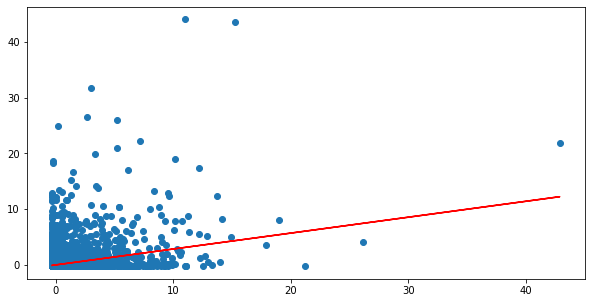

In [1164]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
axes.scatter(X_val_1, y_val_1 )
axes.plot(X_val_1, y_val_predict, 'r')

### Linear Regression con sklearn

In [1165]:
def ECM_graph(X,y,w):
    ecm=0.0
    for n,val in enumerate(y):
        y_est = w[0] + w[1]*X[n]
        ecm = ecm + (y_est - y[n])**2
    return ecm/len(y)


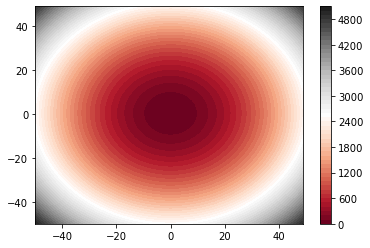

In [1156]:
from mpl_toolkits import mplot3d
w0 = np.arange(-50,50,1)
w1 = np.arange(-50,50,1)
X0, Y0 = np.meshgrid(w0, w1)
Z = ECM_graph(X_train_scaled,y_train_scaled,[X0,Y0])

plt.contourf(X0, Y0, Z, 50, cmap='RdGy')
plt.colorbar()

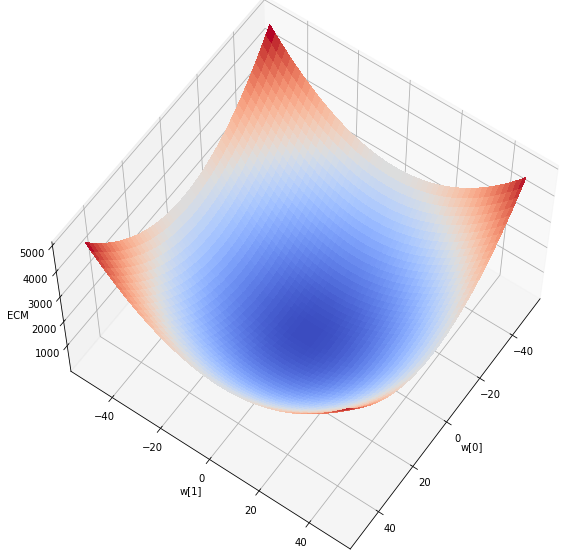

In [1158]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('ECM')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.view_init(60, 35)

In [1166]:
reg = LinearRegression()
reg.fit(X_train_1, y_train_1)

y_val_predict = reg.predict(X_val_1)
lr_mse = mse(y_val_1, y_val_predict)
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_val_1, y_val_predict)))

MSE: 1.1441424366987538 
R2-score: 0.1208142856114457


In [1168]:
reg.intercept_, reg.coef_

(array([-0.0021749]), array([[0.28520684]]))

### 6. Presentación de resultados